 # MP1 - ECE 498:  Data Science & Analytics
 
 
 # Group members (NetIDs): 
    
 ##   Akhilesh Somani (somani4)
 ##   Gowtham Kuntumalla (gowtham4)
 ##   Manan Mehta (mananm2)

In [10]:
import pandas as pd 
import seaborn as sns
import numpy as np  
from datetime import datetime
from scipy import stats as st

from pathlib import Path # to handle imports for different OS

In [11]:
folder = Path("Safety_in_autonomous_vehicles_MP1")
file1 = folder / 'mp1_av_disengagements.csv'
file2 = folder / 'mp1_av_totalmiles.csv'
dseng_df = pd.read_csv(file1)
summary_month_df = pd.read(file2)

FileNotFoundError: [Errno 2] File b'Safety_in_autonomous_vehicles_MP1/mp1_av_disengagements.csv' does not exist: b'Safety_in_autonomous_vehicles_MP1/mp1_av_disengagements.csv'

In [29]:
print(dseng_df)

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause,Month_actual
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection,[14-Sep]
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions,[14-Sep]
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure,[14-Sep]
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle,[14-Sep]
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions,[14-Sep]
...,...,...,...,...,...,...,...,...
1019,14-Nov,WDD2221851A000495,urban-street,clear,manual,NaN,Hardware Fault,[14-Nov]
1020,14-Nov,WDD2221851A000495,urban-street,clear,manual,NaN,System Tuning and Calibration,[14-Nov]
1021,14-Nov,WDD2221851A000495,highway,clear,manual,NaN,System Tuning and Calibration,[14-Nov]
1022,14-Nov,WDD2221851A000495,urban-street,clear,manual,NaN,Hardware Fault,[14-Nov]


In [18]:
dseng_df.count()

Month            1024
Car              1024
Location         1024
Weather          1024
TypeOfTrigger    1024
ReactionTime      492
Cause            1024
dtype: int64

# 2 (a) Total number of AV disengagements: 1024

In [19]:
dseng_df['Month'].apply(lambda x:x.split())

0       [14-Sep]
1       [14-Sep]
2       [14-Sep]
3       [14-Sep]
4       [14-Sep]
          ...   
1019    [14-Nov]
1020    [14-Nov]
1021    [14-Nov]
1022    [14-Nov]
1023    [14-Nov]
Name: Month, Length: 1024, dtype: object

In [33]:
dseng_df['Month_actual'] = dseng_df['Month'].apply(lambda x:x.split("-")[1])

In [34]:
dseng_df

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause,Month_actual
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection,Sep
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions,Sep
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure,Sep
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle,Sep
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions,Sep
...,...,...,...,...,...,...,...,...
1019,14-Nov,WDD2221851A000495,urban-street,clear,manual,NaN,Hardware Fault,Nov
1020,14-Nov,WDD2221851A000495,urban-street,clear,manual,NaN,System Tuning and Calibration,Nov
1021,14-Nov,WDD2221851A000495,highway,clear,manual,NaN,System Tuning and Calibration,Nov
1022,14-Nov,WDD2221851A000495,urban-street,clear,manual,NaN,Hardware Fault,Nov


In [43]:
dseng_df['Month_actual'].unique()

array(['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug'], dtype=object)

In [42]:
len(dseng_df['Month_actual'].unique())

12

# 2 (b) Number of unique months that have recorded AV disengagements: 12

In [45]:
dseng_df['Location'].unique()

array(['urban-street', 'highway'], dtype=object)

In [46]:
len(dseng_df['Location'].unique())

2

# 2 (c) List of unique locations of AV disengagements: 2

In [47]:
len(dseng_df['Cause'].unique())

10

# 2 (d) Number of unique causes for AV disengagements: 10 

In [52]:
dseng_df.isnull().sum()

Month              0
Car                0
Location           0
Weather            0
TypeOfTrigger      0
ReactionTime     532
Cause              0
Month_actual       0
dtype: int64

# 2 (e) ReactionTime has 532 missing values

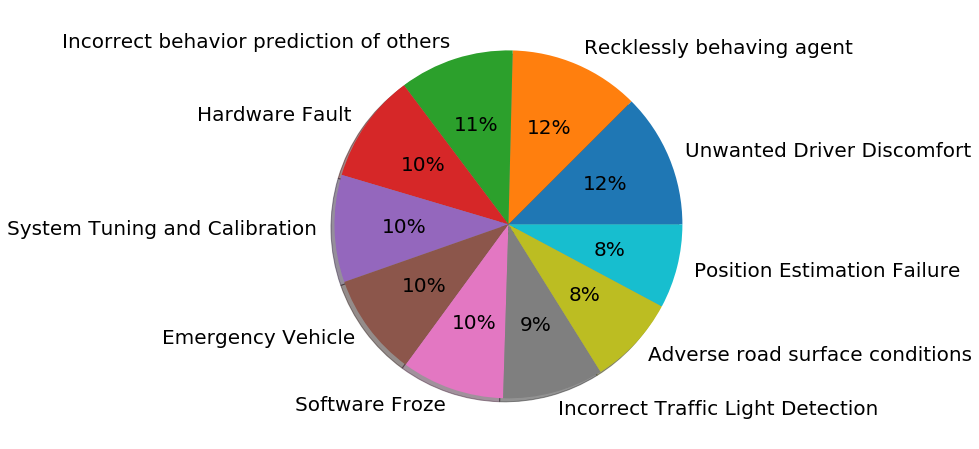

In [53]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
import matplotlib as mpl
mpl.rcParams['font.size'] = 20.0

causes = dseng_df['Cause'].value_counts()
causes = causes[causes>10]
patches, texts, _ = plt.pie(causes, 
        # grab labels from frame keys
        labels=causes.keys(),
        # some formatting
        autopct='%.0f%%', shadow=True)
#plt.legend(patches, labels=causes.keys(), bbox_to_anchor=(0.85,1.025),loc="upper left")
#plt.axis('equal')
plt.show()

# 3 The top two leading causes of disengagement: Recklessly bheaving agent and Unwanted Driver Discomfort